# Question -1
Perform EDA and Explore the features using histograms

sepal.length
sepal.width
petal.length petal.width
variety

# Read in Data

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

iris_data = pd.read_csv('iris.csv')
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
iris_data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


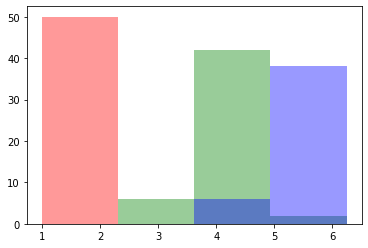

In [16]:
for i in ['petal.length']:
    flower1 = list(iris_data[iris_data['variety'] == 'Setosa'][i].dropna())
    flower2 = list(iris_data[iris_data['variety'] == 'Versicolor'][i].dropna())
    flower3 = list(iris_data[iris_data['variety'] == 'Virginica'][i].dropna())
    
    xmin = min(min(flower1), min(flower2), min(flower3))
    xmax = max(max(flower1), max(flower2), max(flower3))
    
    width = (xmax - xmin) / 4.5
    
    sns.distplot(flower1, color = 'r', kde = False, bins = np.arange(xmin, xmax, width))
    sns.distplot(flower2, color = 'g', kde = False, bins = np.arange(xmin, xmax, width))
    sns.distplot(flower3, color = 'b', kde = False, bins = np.arange(xmin, xmax, width))
    plt.show()
    

In [17]:
iris_data.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


# Question 2


Encode the target variable ie convert it to numeric type

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [20]:
iris['flower'] = iris['sepal.length'] + iris['sepal.width']

In [21]:
iris.drop(['variety'], axis=1, inplace=True)

In [22]:
iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,flower
0,5.1,3.5,1.4,0.2,8.6
1,4.9,3.0,1.4,0.2,7.9
2,4.7,3.2,1.3,0.2,7.9
3,4.6,3.1,1.5,0.2,7.7
4,5.0,3.6,1.4,0.2,8.6
5,5.4,3.9,1.7,0.4,9.3
6,4.6,3.4,1.4,0.3,8.0
7,5.0,3.4,1.5,0.2,8.4
8,4.4,2.9,1.4,0.2,7.3
9,4.9,3.1,1.5,0.1,8.0


In [23]:
iris.to_csv('iris_cleaned.csv', index=False)

# Clean categorical variables
1.Create an indicator variable in place of variety

2.Convert variety to a numeric variable

In [24]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
flower_num = {'Setosa': 0, 'Versicolor': 1,'Virginica': 2}

iris['variety'] = iris['variety'].map(flower_num)

In [26]:
iris.drop(['variety'], axis=1, inplace=True)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
iris.to_csv('iris_cleaned.csv', index=False)

# Question-3A

• Experiment using two different ratios of training, validation and test data ie 60-20-20, 
  80-10-10. On the two different split ratios do the following

# First Ratio (60:20:20) 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Split into train, validation, and test set

In [6]:
features = iris.drop('variety', axis=1)
labels = iris['variety']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [7]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [11]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

#  import libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

# question - 1  
  K-Fold Cross Validation

In [9]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=6)

In [10]:
scores

array([1.        , 0.73333333, 0.93333333, 1.        , 1.        ,
       0.93333333])

# Question -2
Implement Grid Search to find optimal hyperparameters for any 3 algorithms
(out of LR, SVM, MLP, RF, Boosting)


# 1 logistic Regression

In [16]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')




In [17]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [45]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv1 = GridSearchCV(lr, parameters, cv=6)
cv1.fit(tr_features, tr_labels.values.ravel())

print_results(cv1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.711 (+/-0.166) for {'C': 0.001}
0.844 (+/-0.166) for {'C': 0.01}
0.911 (+/-0.147) for {'C': 0.1}
0.944 (+/-0.142) for {'C': 1}
0.922 (+/-0.142) for {'C': 10}
0.922 (+/-0.195) for {'C': 100}
0.922 (+/-0.195) for {'C': 1000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [19]:
cv1.best_estimator_


LogisticRegression(C=1)

 # 2. Random Forest Classifier

In [20]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [21]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv2 = GridSearchCV(rf, parameters, cv=6)
cv2.fit(tr_features, tr_labels.values.ravel())

print_results(cv2)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 50}

0.889 (+/-0.147) for {'max_depth': 2, 'n_estimators': 5}
0.911 (+/-0.183) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.179) for {'max_depth': 2, 'n_estimators': 250}
0.922 (+/-0.179) for {'max_depth': 4, 'n_estimators': 5}
0.922 (+/-0.179) for {'max_depth': 4, 'n_estimators': 50}
0.922 (+/-0.179) for {'max_depth': 4, 'n_estimators': 250}
0.911 (+/-0.183) for {'max_depth': 8, 'n_estimators': 5}
0.933 (+/-0.189) for {'max_depth': 8, 'n_estimators': 50}
0.922 (+/-0.179) for {'max_depth': 8, 'n_estimators': 250}
0.9 (+/-0.168) for {'max_depth': 16, 'n_estimators': 5}
0.922 (+/-0.179) for {'max_depth': 16, 'n_estimators': 50}
0.933 (+/-0.189) for {'max_depth': 16, 'n_estimators': 250}
0.922 (+/-0.179) for {'max_depth': 32, 'n_estimators': 5}
0.9 (+/-0.168) for {'max_depth': 32, 'n_estimators': 50}
0.911 (+/-0.183) for {'max_depth': 32, 'n_estimators': 250}
0.911 (+/-0.166) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.179) 

In [22]:
cv2.best_estimator_


RandomForestClassifier(max_depth=8, n_estimators=50)

# 3.Support Vectore Machines

In [39]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv3 = GridSearchCV(svc, parameters, cv=6)
cv3.fit(tr_features, tr_labels.values.ravel())

print_results(cv3)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.911 (+/-0.147) for {'C': 0.1, 'kernel': 'linear'}
0.833 (+/-0.168) for {'C': 0.1, 'kernel': 'rbf'}
0.944 (+/-0.12) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.162) for {'C': 1, 'kernel': 'rbf'}
0.911 (+/-0.183) for {'C': 10, 'kernel': 'linear'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'rbf'}


In [40]:
cv3.best_estimator_

SVC(C=1, kernel='linear')

# question -3 
Analyze the results on Validation set and test set and mention which model
performed the best and why


In [25]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [26]:
LR=cv1.best_estimator_
RF=cv2.best_estimator_
SVM=cv3.best_estimator_

In [27]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [28]:
models={'LR':LR,'RF':RF,'SVM':SVM}
models

{'LR': LogisticRegression(C=1),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=50),
 'SVM': SVC(C=1, kernel='linear')}

In [29]:
for mdl in models:
     evaluate_model(mdl, models[mdl], val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
RF -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 8.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.1ms


# second Ratio (80:10:10)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
features = iris.drop('variety', axis=1)
labels = iris['variety']


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [32]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


 # k-fold cross

In [33]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=8)

In [34]:
scores

array([1.        , 1.        , 0.63636364, 0.81818182, 1.        ,
       0.90909091, 1.        , 0.90909091])

# LogisticRegression

In [41]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv4 = GridSearchCV(lr, parameters, cv=8)
cv4.fit(tr_features, tr_labels.values.ravel())

print_results(cv4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.643 (+/-0.166) for {'C': 0.001}
0.82 (+/-0.162) for {'C': 0.01}
0.909 (+/-0.182) for {'C': 0.1}
0.943 (+/-0.18) for {'C': 1}
0.921 (+/-0.191) for {'C': 10}
0.921 (+/-0.248) for {'C': 100}
0.921 (+/-0.248) for {'C': 1000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [42]:
cv4.best_estimator_

LogisticRegression(C=1)

# RandomForestClassifier

In [37]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv5 = GridSearchCV(rf, parameters, cv=8)
cv5.fit(tr_features, tr_labels.values.ravel())

print_results(cv5)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 5}

0.898 (+/-0.231) for {'max_depth': 2, 'n_estimators': 5}
0.932 (+/-0.236) for {'max_depth': 2, 'n_estimators': 50}
0.92 (+/-0.231) for {'max_depth': 2, 'n_estimators': 250}
0.912 (+/-0.265) for {'max_depth': 4, 'n_estimators': 5}
0.91 (+/-0.223) for {'max_depth': 4, 'n_estimators': 50}
0.932 (+/-0.236) for {'max_depth': 4, 'n_estimators': 250}
0.92 (+/-0.248) for {'max_depth': 8, 'n_estimators': 5}
0.91 (+/-0.241) for {'max_depth': 8, 'n_estimators': 50}
0.909 (+/-0.241) for {'max_depth': 8, 'n_estimators': 250}
0.944 (+/-0.239) for {'max_depth': 16, 'n_estimators': 5}
0.909 (+/-0.241) for {'max_depth': 16, 'n_estimators': 50}
0.91 (+/-0.223) for {'max_depth': 16, 'n_estimators': 250}
0.899 (+/-0.231) for {'max_depth': 32, 'n_estimators': 5}
0.91 (+/-0.223) for {'max_depth': 32, 'n_estimators': 50}
0.899 (+/-0.231) for {'max_depth': 32, 'n_estimators': 250}
0.887 (+/-0.218) for {'max_depth': None, 'n_estimators': 5}
0.899 (+/-0.231) fo

In [38]:
cv5.best_estimator_


RandomForestClassifier(max_depth=16, n_estimators=5)

 # SVM 

In [43]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv6 = GridSearchCV(svc, parameters, cv=8)
cv6.fit(tr_features, tr_labels.values.ravel())

print_results(cv6)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.943 (+/-0.156) for {'C': 0.1, 'kernel': 'linear'}
0.82 (+/-0.162) for {'C': 0.1, 'kernel': 'rbf'}
0.943 (+/-0.156) for {'C': 1, 'kernel': 'linear'}
0.943 (+/-0.156) for {'C': 1, 'kernel': 'rbf'}
0.899 (+/-0.231) for {'C': 10, 'kernel': 'linear'}
0.933 (+/-0.15) for {'C': 10, 'kernel': 'rbf'}


In [44]:
cv3.best_estimator_

SVC(C=1, kernel='linear')

In [46]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [47]:
models={'LR':LR,'RF':RF,'SVM':SVM}
models

{'LR': LogisticRegression(C=1),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=50),
 'SVM': SVC(C=1, kernel='linear')}

In [48]:
for mdl in models:
     evaluate_model(mdl, models[mdl], val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
RF -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 8.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
